In [ ]:
import os

!sudo apt -qq install file
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python2 fslinstaller.py

fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, 'bin')
!. ${FSLDIR}/etc/fslconf/fsl.sh

!flirt -version

In [ ]:
#imports
import numpy as np
import nibabel as nib
import nipype.interfaces.fsl as fsl
from nipype.interfaces import fsl
from nipype.testing import example_data
from nipype.interfaces.fsl.utils import Reorient2Std
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#generate list of input images
os.chdir('/content/')
def get_image_input_list():
  dir = 'drive/MyDrive/Colab Notebooks/ADNI AD detection/AD_Detection/ADNI'
  file_list = []
  files = os.listdir(dir)
  for i in files:
    parent_dir = os.path.join(dir, i)
    for j in range(3):
      list_of_next = os.listdir(parent_dir)
      parent_dir = os.path.join(parent_dir,list_of_next[len(list_of_next)-1])
    file_list.append(parent_dir)
    print(parent_dir)
  return file_list
    
input_files = get_image_input_list()

In [ ]:
#function to skullstrip all images
def skullstrip(frac = 0.):
  for i in input_files:
    print(i)
    os.chdir(i)
    file = os.listdir('.')
    mybet = fsl.BET(in_file = file[0], out_file = 'brain_skull_stripped.nii', frac = 0.47)
    result = mybet.run()


In [ ]:
file = os.listdir('.')
mybet = fsl.BET(in_file = file[0], out_file = 'brain_skull_stripped.nii', frac = 0.48)
result = mybet.run()


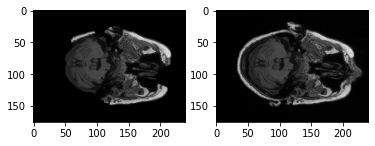

In [ ]:
f, axarr = plt.subplots(1,2)

img = nib.load('brain_skull_stripped.nii').get_fdata()
test = img[:,:,100]
axarr[0].imshow(test, cmap='gray')

img = nib.load(file[0]).get_fdata()
test = img[:,:,100]
axarr[1].imshow(test, cmap='gray')


In [ ]:
print(os.getcwd())
#using FLIRT and reorient2std
reorient = Reorient2Std(out_file = 'reorient.nii')
reorient.inputs.in_file = file[0]
res = reorient.run()

#flt = fsl.FLIRT(bins=640, cost_func='mutualinfo')
#flt.inputs.in_file = file[0]
#flt.inputs.reference = 'mni.nii'


/content/drive/MyDrive/Colab Notebooks/ADNI AD detection/AD_Detection/ADNI/073_S_4559/MT1__N3m/2016-06-30_12_13_28.0/S516862
220809-00:56:12,605 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI


220809-00:56:13,370 nipype.interface INFO:
	 stderr 2022-08-09T00:56:13.369827:/usr/local/fsl/bin/fslreorient2std: 1: /usr/local/fsl/bin/fslreorient2std: bc: not found


INFO:nipype.interface:stderr 2022-08-09T00:56:13.369827:/usr/local/fsl/bin/fslreorient2std: 1: /usr/local/fsl/bin/fslreorient2std: bc: not found
